<a href="https://colab.research.google.com/github/ycyoondev/ML-study/blob/master/211101_CNN-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

CNN 학습 시각화 사이트: https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

CNN이란 변수들을 잘라서 조각들을 가지고 학습시키는 개념이다.
이미지를 예시로 보면 아래와깉이 바둑판처럼 이미지를 자르고 그것을 각각 conv라고 한다. 이를 학습(RELU 이용)시켜서 최종 결과를 찾는다.

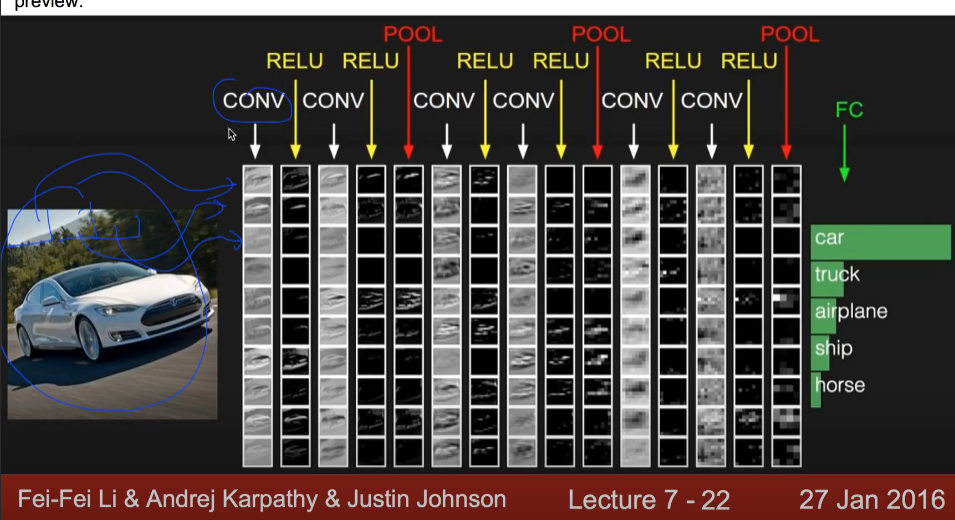

아래와같이 32*32*3 이미지가 있다고 하자. 위 예시처럼 이미지의 일부만 처리해보자. 이를 filter라고 하자고, 크기는 5*5*3이라고 하자. 이 filter는 궁극적으로 한 값을 만들어낸다.

이제 어떻게 한개의 값을 만들 수 있는지 살펴보자. 이를 Wx+b의 식을 이용해서 만들 수 있다. 이는 모두 백터라고 생각하면 이해하기 좋다. 

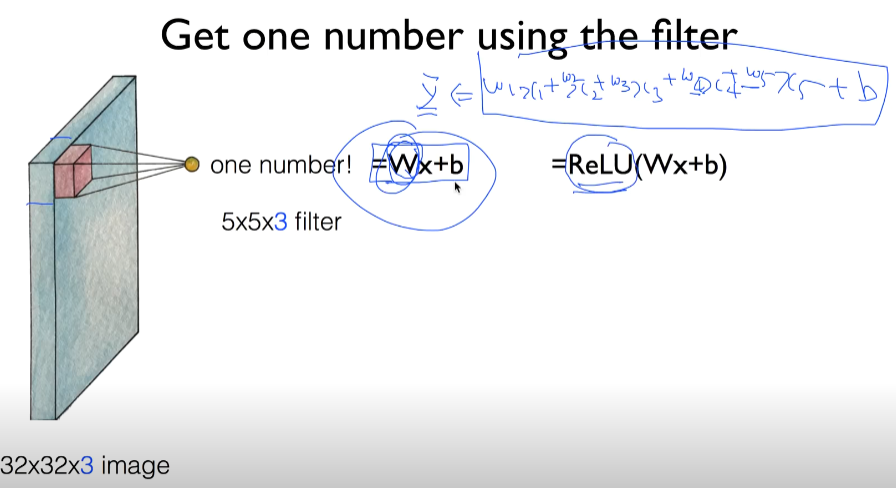

이제 하나의 filter를 학습하였고, 이를 전체 진행한다고 생각해보자. 그럼 최종적으로 몇개의 값이 생길까?

일단 이를 알기위해 작은 2D 이미지에서 생각해보자.

아래를 보면 가로로 5번 세로로 5번을 한칸씩 움직여서 만들 수 있고, 따라서 총 5*5 output을 만든다.
이때, 우리는 1칸씩 움직였는데 이를 stride라고 한다.

만약 같은 예시에서 stride를 2라고 하면 가로 3개 세로 3개로 총 3*3 output을 만든다.

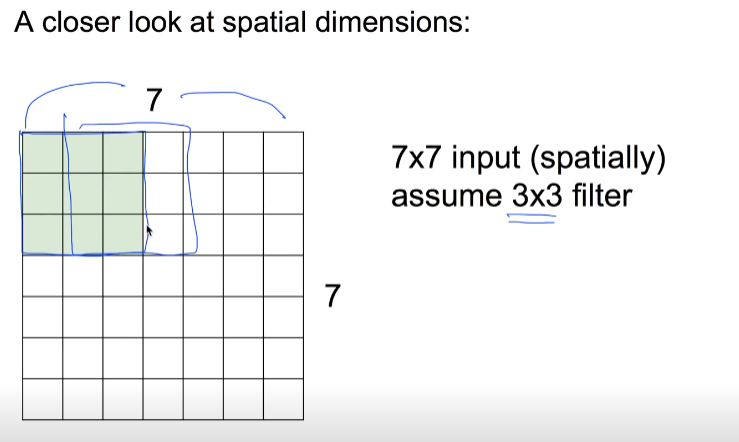

이를 일반화 하면 아래와같은 식이 만들어진다. 

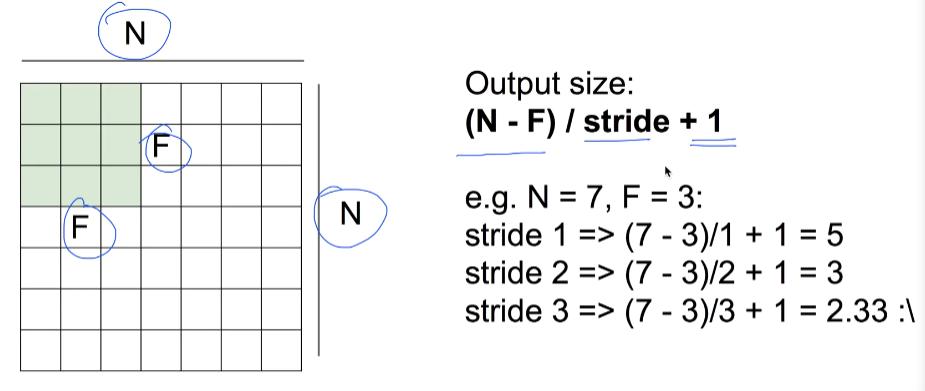

하지만 이렇게 진행될수록 점점 크기가 작아지고, 사이즈가 작아지면서 자료를 잃어버린다. 이렇게 잃어버리는것을 방지하기 위해 아래와같이 padding을 사용한다. padding을 통해 이미지 크기가 변하지 않았다.

padding은 이미지가 작아지는것과, 테두리를 인식시킨다는 기능이 있다.

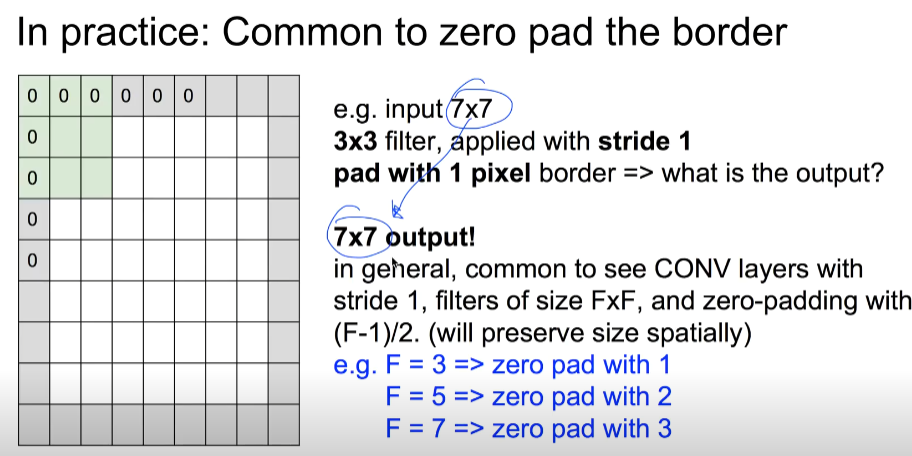

이제 앞서서 3차원에서 다시 생각해보자. 아래 그림은 filter 6개를 만들었다. (a, b, c)가 나온다고 하면, c는 필터의 수와 같고, a, b는 필터를 거친 크기이다.

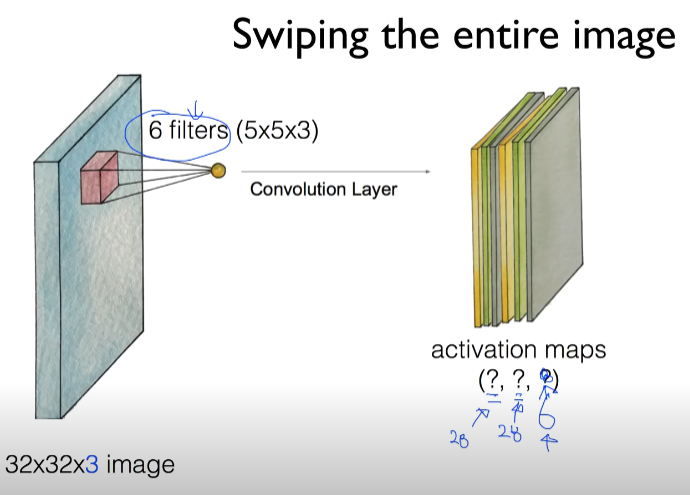

이를 한번 수행하는 CNN이다. 이제 여러번 Conv ReLU를 한다고 해보자. 중간에 분홍색은 arcivate map이다.

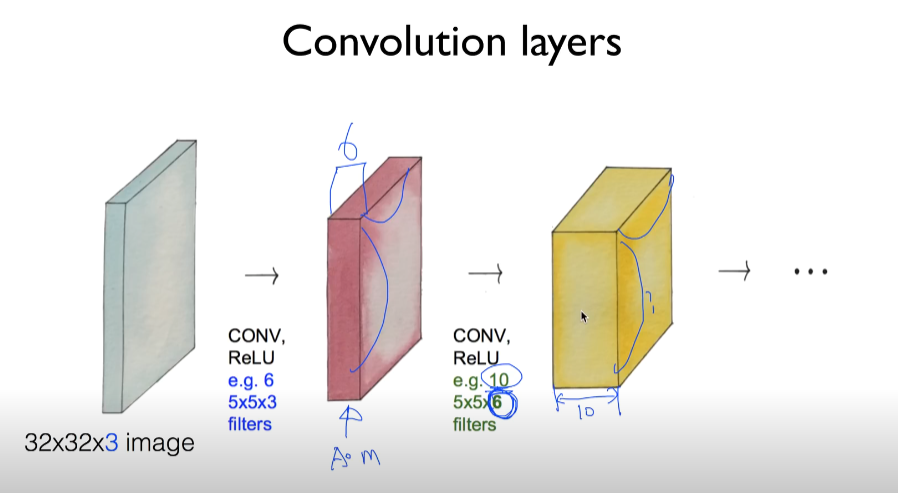

여기서 Waight의 개수는 무엇일까? 위 그림에서 처음은 5*5*3*6이다. 이런 방식으로 W를 만들수잇고, 다른 학습 모델과 유사하게 처음에 랜덤 등의 방식으로 초기화를 하고 학습시킨다.

## Pool

앞서 Conv와 ReLU를 살펴보았고, 이제 중간에 이뤄지는 Pool을 살펴본다.

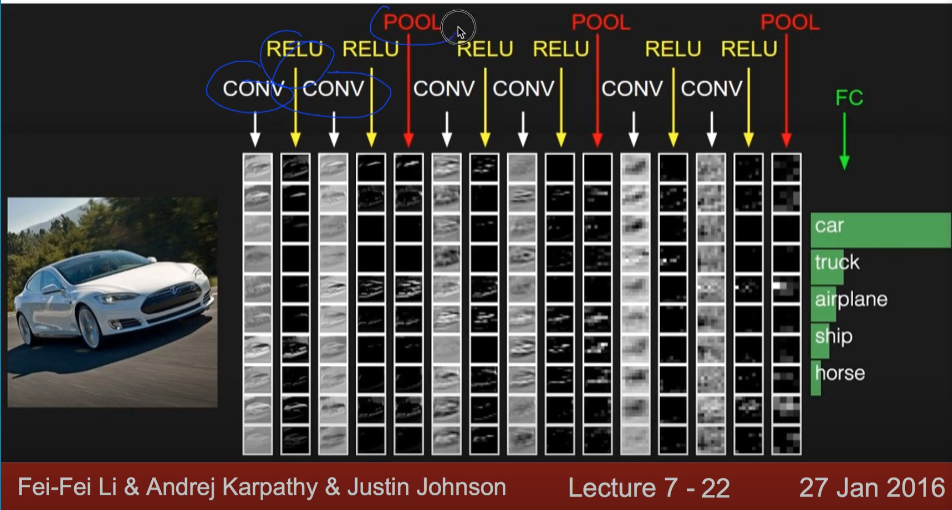

Pooling Layer는 간단하게 sampling이라고 생각할 수 있다. 

아래 conv layer에서 한개의 layer를 뽑아서 사이즈를 작게 만든다고 생각해보자. 
그리고 그것을 다시 쌓는 방식이다. (하나씩 뽑아서 줄인다음 쌓는 행위이다.)

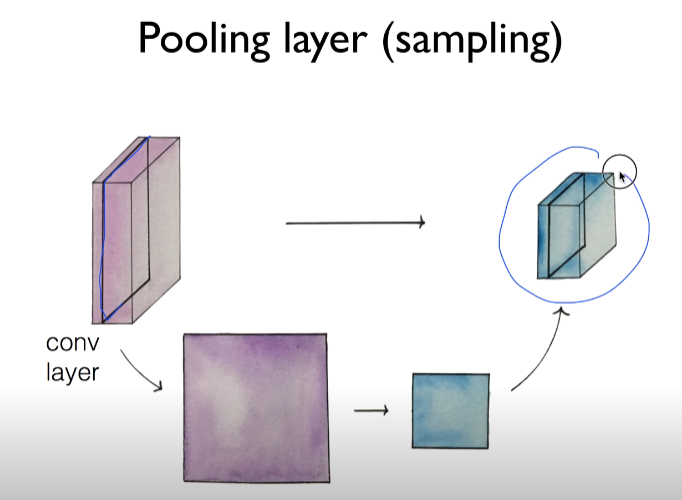

한번 아래 2D그림으로 이해해보자.

2*2 filter로 stride 2로 진행하자. 그럼 이 내부에서 어떻게 줄일지 고민이 된다. 평균을 낼수도있고, 최대 최소를 고를 수도 있다. 가장 많이 사용되는 방법은 Max Pooling으로 최대값을 고르는 방법이다. 

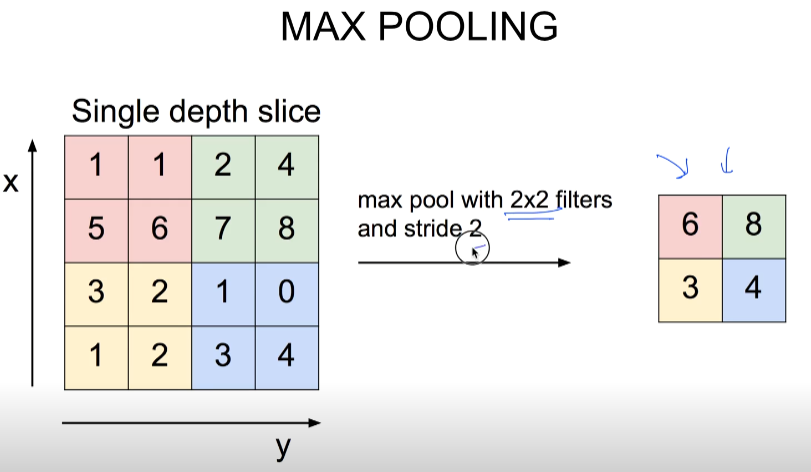

이제 ReLU를 알아보자.

이는 간단하게 conv에서 나온 vector를 ReLU로 계산하고 Pooling하는것이다. 이러한 층은 학습자가 임의로 정할 수 있다.

마지막 Pooling은 전체 값을 시그모이드 등으로 하나의 레이블을 고르는 방법이다. (DNN과 유사)